In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [59]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
# Quickly check to see the size of our DF, both rows and columns
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [61]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [62]:
df_tristate = df[df['_STATE'].isin([9, 34, 36])]

In [63]:
# your code here
df['_STATE'].unique()

array([ 9., 34., 36.])

Now check to see how large our subset df.

In [64]:
# your code here
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [65]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [67]:
#your code here
zero_dict = {88:0,
            77: np.nan,
            99: np.nan}


df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

#create a dictionary, replace everything in this column based on this dictionary 

In [68]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [69]:
df.dropna(subset=['PHYSHLTH'])

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
49943,9.0,1.0,1192017,1,19,2017,1100.0,2017000006,2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
49944,9.0,1.0,2032017,2,3,2017,1100.0,2017000007,2.017000e+09,1.0,...,2.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49945,9.0,1.0,2012017,2,1,2017,1100.0,2017000008,2.017000e+09,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49946,9.0,1.0,1262017,1,26,2017,1100.0,2017000009,2.017000e+09,1.0,...,2.0,2.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0
49947,9.0,1.0,1192017,1,19,2017,1100.0,2017000010,2.017000e+09,1.0,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0


In [70]:
df['PHYSHLTH'].value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [71]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

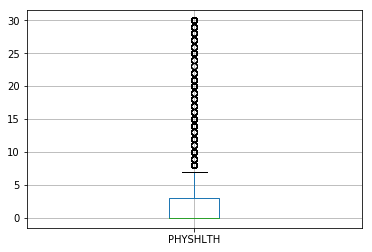

In [72]:
# graphic showing those descriptive stats (bloxplot)
df.boxplot(['PHYSHLTH'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x146c50f60>]],
      dtype=object)

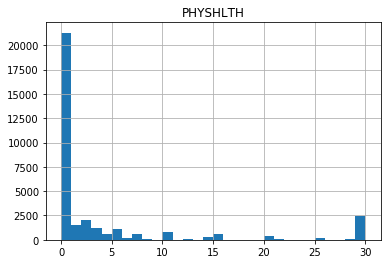

In [73]:
# graphic showing the distribution of data (histogram)
df.hist(['PHYSHLTH'], bins=30)

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [74]:
# code to calculate the average number of sick days by state
avg_state_sick_days = df.groupby('_STATE')['PHYSHLTH'].mean()

In [75]:
avg_state_sick_days

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

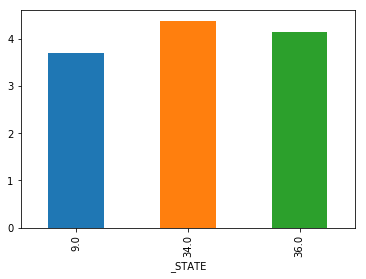

In [76]:
# code to graph those averages using matplotliba
avg_state_sick_days.plot.bar()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [77]:
# code to create new colum for chronically sick

df['chronic'] = np.where(df['PHYSHLTH']>=10, 1, 0)
df['chronic'].head(10)

49938    0
49939    0
49940    0
49941    0
49942    0
49943    0
49944    0
49945    0
49946    1
49947    0
Name: chronic, dtype: int64

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [78]:
# code to calculate averages per state
df['sick'] = np.where(df['PHYSHLTH']>=1, 1, 0)
df['sick'].head()

49938    0
49939    0
49940    1
49941    0
49942    0
Name: sick, dtype: int64

In [79]:
df.groupby('_STATE')['sick'].mean()

_STATE
9.0     0.343219
34.0    0.354886
36.0    0.380602
Name: sick, dtype: float64

In [80]:
percent_sick = df.groupby('_STATE')['sick'].mean()

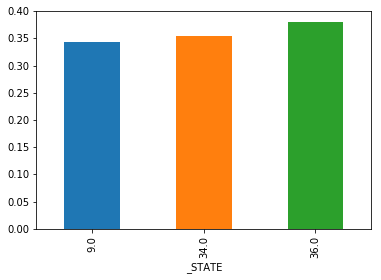

In [81]:
percent_sick.plot.bar()

In [82]:
# create graphic to compare chronically sick by state
chronic_sick = df.groupby('_STATE')['chronic'].sum()


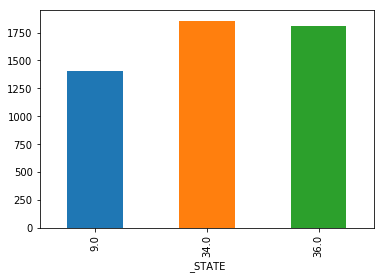

In [83]:
chronic_sick.plot.bar()

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [84]:
df['SMOKDAY2'].value_counts()

3.0    9703
1.0    2676
2.0    1371
9.0      27
7.0       6
Name: SMOKDAY2, dtype: int64

In [85]:
df['SMOKDAY2'].describe()

count    13783.000000
mean         2.525720
std          0.853626
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: SMOKDAY2, dtype: float64

In [89]:
df['SMOKDAY2'].dtype

dtype('float64')

In [90]:
smoke_dict = {7: np.nan,
            9: np.nan}


df['SMOKDAY2'] = df['SMOKDAY2'].replace(smoke_dict)

In [91]:
df['SMOKDAY2'].describe()

count    13750.000000
mean         2.511055
std          0.799475
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: SMOKDAY2, dtype: float64

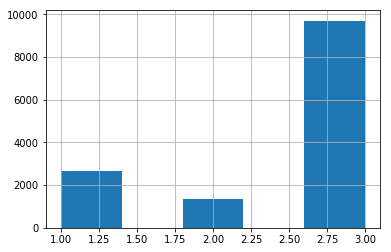

In [93]:
df['SMOKDAY2'].hist(bins=5)

In [99]:
df.groupby('_STATE')['SMOKDAY2'].mean()

_STATE
9.0     2.585007
34.0    2.506751
36.0    2.448393
Name: SMOKDAY2, dtype: float64

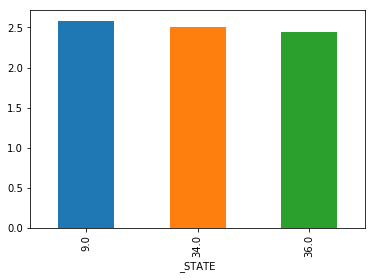

In [103]:
df.groupby('_STATE')['SMOKDAY2'].mean().plot.bar()

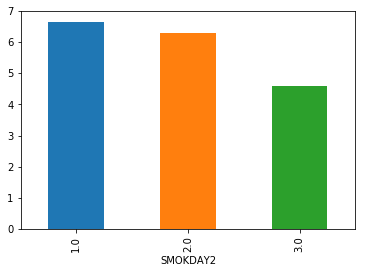

In [112]:
df.groupby('SMOKDAY2')['PHYSHLTH'].mean().plot.bar() #if you don't smoke you are likely to be less sick 

In [113]:
smoking_sickness = df.groupby('SMOKDAY2')['PHYSHLTH'].mean()

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [139]:
df['ALCDAY5'].head()

49938   -395.715
49939   -170.000
49940    488.000
49941   -387.145
49942   -395.715
Name: ALCDAY5, dtype: float64

In [140]:
df['ALCDAY5'] = df['ALCDAY5'].map(lambda x: 4.285*(x - 100) if (x > 100) and (x < 200)else x - 100)

In [141]:
df['ALCDAY5'] = df['ALCDAY5'].map(lambda x: (x - 200) if (x > 200) and (x < 300) else x - 200)

In [142]:
df['ALCDAY5'].head()

49938   -395.715
49939   -170.000
49940    488.000
49941   -387.145
49942   -395.715
Name: ALCDAY5, dtype: float64

In [143]:
alc_dict = {888: 0,
            777: np.nan,
           999: np.nan}


df['ALCDAY5'] = df['ALCDAY5'].replace(alc_dict)

In [144]:
df['ALCDAY5'].unique()

array([-395.715, -170.   ,  488.   , -387.145, -382.86 , -196.   ,
       -195.   , -370.005, -185.   , -198.   , -199.   , -180.   ,
       -197.   , -186.   , -193.   , -391.43 , -190.   ,      nan,
       -192.   , -378.575, -171.   , -173.   , -174.   , -184.   ,
       -194.   , -178.   ,  599.   ,  377.   , -175.   , -172.   ,
       -187.   , -188.   , -176.   , -374.29 , -182.   , -183.   ,
       -179.   , -189.   , -191.   , -181.   , -177.   ])

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  